In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
gdp = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_174336.csv', skiprows=4) 
life = pd.read_csv('API_SP.DYN.LE00.IN_DS2_en_csv_v2_132.csv', skiprows=4)
health = pd.read_csv('API_SH.XPD.CHEX.PC.CD_DS2_en_csv_v2_174048.csv', skiprows=4)

print("Datasets loaded")

Datasets loaded


In [3]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27441.550214,28440.041688,30082.158423,30645.890602,22759.807175,26749.329609,30975.998912,35718.753119,39498.594129,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,186.089204,186.909053,197.367547,225.400079,208.962717,226.836135,...,1334.470500,1528.104224,1552.073722,1507.085600,1351.591669,1562.416175,1679.327622,1571.449189,1615.396356,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,522.082216,525.469771,491.337221,496.602504,510.787063,356.496214,357.261153,413.757895,NaN,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,121.936832,127.451040,133.823783,139.004980,148.545883,155.561897,...,1630.039439,1574.230564,1720.140092,2216.385055,2030.861659,2112.794076,2138.473153,1841.855064,1411.337029,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2051.814621,2790.718869,2860.093648,2493.678844,1759.356199,2303.908127,3682.113151,2916.136633,2665.874448,NaN


In [4]:
life.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.049000,64.215000,64.602000,64.944000,65.303000,65.615000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.226000,76.353000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.169658,44.468838,44.877890,45.160583,45.535695,45.770723,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.487020,65.146154,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.799000,33.291000,33.757000,34.201000,34.673000,35.124000,...,62.646000,62.406000,62.443000,62.941000,61.454000,60.417000,65.617000,66.035000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.779636,38.058956,38.681792,38.936918,39.194580,39.479784,...,56.392452,56.626439,57.036976,57.149847,57.364425,57.362572,57.987813,58.855722,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.933000,36.902000,37.168000,37.419000,37.704000,37.968000,...,61.619000,62.122000,62.622000,63.051000,63.116000,62.958000,64.246000,64.617000,NaN,NaN


In [5]:
health.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,85.899217,90.013150,90.075653,87.298246,81.551895,92.386575,92.581521,NaN,NaN,NaN
2,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,61.372345,66.823883,71.225090,74.064239,80.089233,81.521126,80.651604,NaN,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,61.448089,58.221515,56.124265,59.069528,64.407423,72.241095,74.421351,NaN,NaN,NaN
4,Angola,AGO,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,94.014816,112.753647,84.031044,64.613976,55.939163,67.046570,101.256142,NaN,NaN,NaN


In [6]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            151 non-null    float64
 5   1961            154 non-null    float64
 6   1962            156 non-null    float64
 7   1963            156 non-null    float64
 8   1964            156 non-null    float64
 9   1965            162 non-null    float64
 10  1966            163 non-null    float64
 11  1967            167 non-null    float64
 12  1968            168 non-null    float64
 13  1969            168 non-null    float64
 14  1970            190 non-null    float64
 15  1971            191 non-null    float64
 16  1972            191 non-null    float64
 17  1973            191 non-null    flo

In [7]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            263 non-null    float64
 5   1961            264 non-null    float64
 6   1962            264 non-null    float64
 7   1963            263 non-null    float64
 8   1964            263 non-null    float64
 9   1965            263 non-null    float64
 10  1966            264 non-null    float64
 11  1967            264 non-null    float64
 12  1968            264 non-null    float64
 13  1969            264 non-null    float64
 14  1970            264 non-null    float64
 15  1971            264 non-null    float64
 16  1972            264 non-null    float64
 17  1973            264 non-null    flo

In [8]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [9]:
gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
count,151.000000,154.000000,156.000000,156.000000,156.000000,162.000000,163.000000,167.000000,168.000000,168.000000,...,259.000000,259.000000,259.000000,259.000000,258.000000,258.000000,257.000000,251.000000,240.000000,0.0
mean,471.801812,491.169565,538.650484,571.509413,617.797769,672.917147,716.784470,730.132376,763.880229,827.500201,...,15783.784841,16592.499881,17573.925150,17537.480522,16283.153813,18803.437185,19476.548373,20172.185789,19724.631062,NaN
std,593.004639,616.999240,729.010673,753.033032,811.026840,840.675732,907.766379,938.440133,984.135076,1060.382766,...,23679.818023,24429.210650,25930.239350,25636.630243,24311.651161,28779.971299,28996.961493,30917.462749,30040.258015,NaN
min,25.084776,27.265454,27.947004,25.803984,17.332201,15.117863,11.801322,16.545381,21.545341,21.510318,...,232.937812,246.060726,245.661678,234.310616,255.832454,264.980379,302.992505,250.627253,219.424831,NaN
25%,123.298251,127.469973,129.546141,138.894446,144.547396,155.774300,164.134108,162.377365,166.230264,175.154789,...,2061.113678,2163.095257,2163.093927,2227.362557,2133.015667,2462.698252,2536.400502,2541.703814,2619.263802,NaN
50%,221.559849,209.531940,217.376949,233.409578,244.104274,271.540924,282.446374,283.733706,301.234016,316.067555,...,5959.842504,6233.322448,6713.989254,6718.858266,6131.818702,7001.419123,7606.237525,7802.824333,7836.504782,NaN
75%,499.867270,538.358099,574.686135,610.222254,707.377633,851.125067,895.792733,844.844588,847.350025,901.091256,...,19317.086925,20839.226799,22413.498842,22627.756511,19908.734345,22009.595072,24387.038729,23979.291930,24745.502555,NaN
max,2999.864872,3059.160821,4748.392844,4444.523086,4378.784298,4023.990378,4176.110382,4325.959351,4684.588403,5019.998186,...,173604.753556,170663.375248,188298.315668,193746.785647,176891.886538,223823.363960,226052.001905,256799.788613,288001.433369,NaN


In [9]:
life.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
count,263.000000,264.000000,264.000000,263.000000,263.000000,263.000000,264.000000,264.000000,264.000000,264.000000,...,265.000000,265.000000,265.000000,265.000000,265.00000,265.000000,265.000000,265.000000,0.0,0.0
mean,54.021422,54.664230,55.280667,55.606368,56.102078,56.408430,56.862954,57.315183,57.659650,57.919406,...,71.989503,72.156495,72.513470,72.695392,72.14487,71.430551,72.795654,73.458600,NaN,NaN
std,11.615002,11.454925,11.144828,11.076024,11.004538,11.028277,10.994922,10.901085,10.743450,10.716892,...,7.960665,7.977641,7.549511,7.747485,7.22641,7.481863,7.648548,6.960836,NaN,NaN
min,28.054000,28.278000,28.506000,28.249000,31.231000,28.781000,25.633000,25.858000,26.103000,25.396000,...,36.720000,35.351000,51.905000,31.530000,50.59600,40.279000,18.818000,54.462000,NaN,NaN
25%,43.568100,44.831894,45.957827,46.475500,47.065000,47.280189,48.059492,48.489148,49.042046,49.474250,...,66.242000,66.612000,66.965000,67.167000,66.92400,66.199000,67.713000,68.337000,NaN,NaN
50%,54.359000,54.730500,55.346515,55.711419,56.220000,56.866241,57.371279,58.136700,58.680000,59.285389,...,73.136000,73.389000,73.555000,73.658000,72.63600,71.757000,73.702439,73.844000,NaN,NaN
75%,64.195500,64.731500,64.954006,65.245171,65.657037,66.147500,66.542854,67.010171,67.328341,67.580835,...,77.681323,77.753659,77.942000,78.208000,77.44981,76.865768,77.832768,78.473171,NaN,NaN
max,74.040073,73.652683,73.721951,73.586000,73.855927,74.106463,74.316195,74.499610,74.696171,74.842927,...,85.630000,85.878000,86.084000,86.151000,86.08900,85.532683,85.746000,86.372000,NaN,NaN


In [15]:
health.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,238.000000,239.000000,240.000000,240.000000,240.000000,239.000000,238.000000,21.000000,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1015.341856,1060.492322,1113.709159,1121.809831,1180.150494,1321.073087,1287.917843,3682.904908,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1724.180245,1788.620513,1875.437878,1875.568505,2008.950899,2218.381219,2137.513286,2405.043926,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.720211,13.462928,12.705347,12.872213,12.423132,14.633775,15.346392,194.056152,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.821758,75.809086,76.098447,75.817483,79.578697,91.122687,90.560333,1714.892700,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,310.537491,323.314309,331.397293,344.014435,352.868500,391.815369,401.871521,3228.435059,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,986.866882,994.785797,1057.577793,1061.757371,1096.347656,1179.292175,1232.575608,6152.333008,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9536.206055,9822.378906,10182.255859,10546.013672,11672.770508,11999.090820,12434.433594,7504.584961,NaN,NaN


In [10]:
gdp.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              115
                 ... 
2021                8
2022                9
2023               15
2024               26
Unnamed: 69       266
Length: 70, dtype: int64

In [11]:
life.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960                3
                 ... 
2021                1
2022                1
2023                1
2024              266
Unnamed: 69       266
Length: 70, dtype: int64

In [18]:
health.isnull().sum()

Country Name        0
Country Code        0
Indicator Name      0
Indicator Code      0
1960              266
                 ... 
2021               27
2022               28
2023              245
2024              266
Unnamed: 69       266
Length: 70, dtype: int64

In [12]:
countries = [
    'Sri Lanka','India','Bangladesh','Pakistan',
    'Singapore','Japan','Korea, Rep.',
    'United States','Norway','Germany',
    'Ethiopia','Nigeria'
]

def clean_dataset(df, value_name):

    df = df[df['Country Name'].isin(countries)]

    year_cols = [c for c in df.columns if c.isdigit() and 2000 <= int(c) <= 2023]

    df = df[['Country Name'] + year_cols]

    df = df.melt(id_vars='Country Name',
                 var_name='Year',
                 value_name=value_name)

    df['Year'] = df['Year'].astype(int)

    df = df.dropna()

    return df


gdp_clean = clean_dataset(gdp,'GDP_per_capita')
life_clean = clean_dataset(life,'Life_Expectancy')
health_clean = clean_dataset(health,'Healthcare_Spending')

merged = pd.merge(gdp_clean, life_clean, on=['Country Name','Year'])
merged = pd.merge(merged, health_clean, on=['Country Name','Year'])

merged = merged.drop_duplicates()
merged = merged.reset_index(drop=True)

merged.isnull().sum()

Country Name           0
Year                   0
GDP_per_capita         0
Life_Expectancy        0
Healthcare_Spending    0
dtype: int64

In [13]:
merged.to_csv('merged_data_complete.csv', index=False)
print("Merged dataset saved")

Merged dataset saved


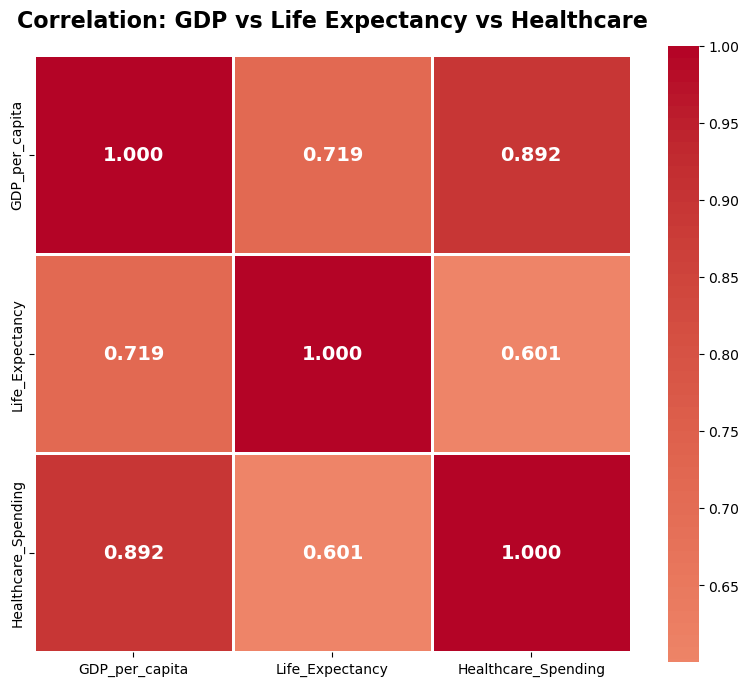

 Correlation heatmap saved!


In [14]:
# Calculate correlation
correlation = merged[['GDP_per_capita', 'Life_Expectancy', 'Healthcare_Spending']].corr()

# Create the heatmap with exact styling
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, 
            annot=True,           # Show numbers
            cmap='coolwarm',      # Color scheme
            center=0,             # Center the color scale at 0
            square=True,          # Make cells square
            linewidths=2,         # White lines between cells
            linecolor='white',    # White border color
            fmt='.3f',            # 3 decimal places
            annot_kws={'size': 14, 'weight': 'bold'},  # Number styling
            cbar_kws={'shrink': 0.8})  # Color bar size

plt.title('Correlation: GDP vs Life Expectancy vs Healthcare', 
          fontsize=16, fontweight='bold', pad=20)

# Make labels clearer
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Correlation heatmap saved!")

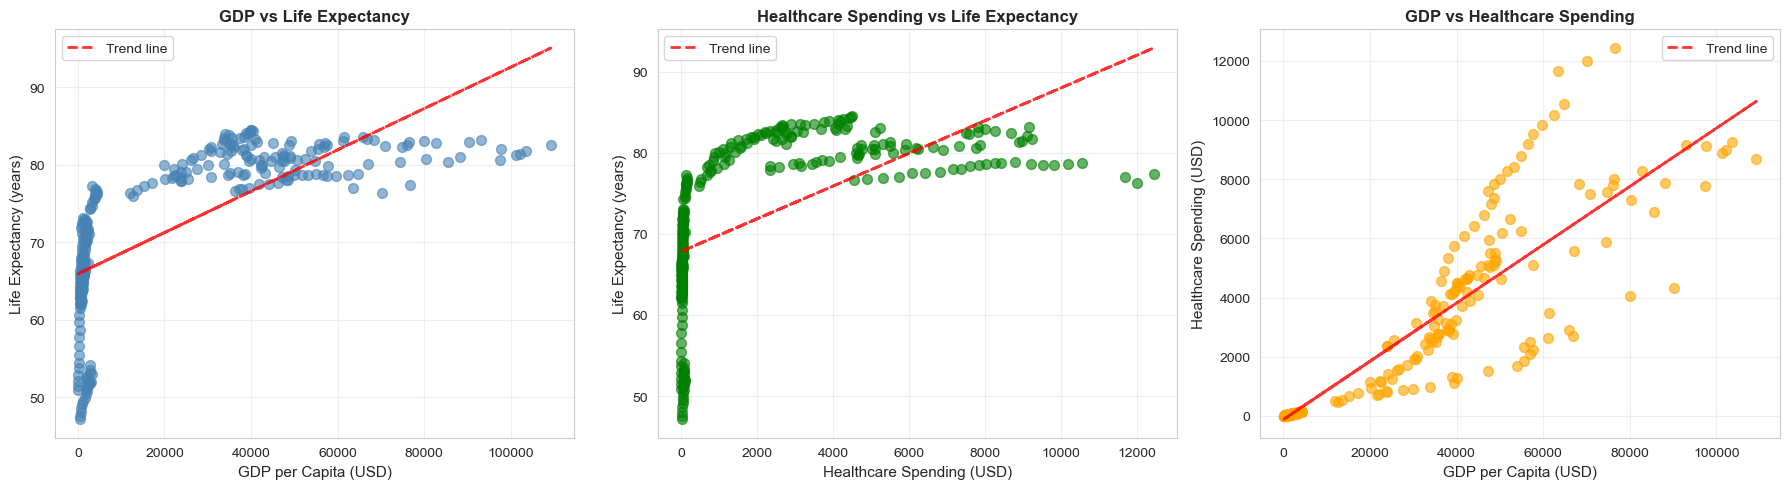

 All 3 scatter plots saved as 'scatter_plots_all.png'


In [19]:

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: GDP vs Life Expectancy
axes[0].scatter(merged['GDP_per_capita'], merged['Life_Expectancy'], 
                alpha=0.6, s=50, color='steelblue')
axes[0].set_xlabel('GDP per Capita (USD)', fontsize=11)
axes[0].set_ylabel('Life Expectancy (years)', fontsize=11)
axes[0].set_title('GDP vs Life Expectancy', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Add trend line
z1 = np.polyfit(merged['GDP_per_capita'], merged['Life_Expectancy'], 1)
p1 = np.poly1d(z1)
axes[0].plot(merged['GDP_per_capita'], p1(merged['GDP_per_capita']), 
             "r--", alpha=0.8, linewidth=2, label='Trend line')
axes[0].legend()

# Plot 2: Healthcare vs Life Expectancy
axes[1].scatter(merged['Healthcare_Spending'], merged['Life_Expectancy'], 
                alpha=0.6, s=50, color='green')
axes[1].set_xlabel('Healthcare Spending (USD)', fontsize=11)
axes[1].set_ylabel('Life Expectancy (years)', fontsize=11)
axes[1].set_title('Healthcare Spending vs Life Expectancy', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Add trend line
z2 = np.polyfit(merged['Healthcare_Spending'], merged['Life_Expectancy'], 1)
p2 = np.poly1d(z2)
axes[1].plot(merged['Healthcare_Spending'], p2(merged['Healthcare_Spending']), 
             "r--", alpha=0.8, linewidth=2, label='Trend line')
axes[1].legend()

# Plot 3: GDP vs Healthcare
axes[2].scatter(merged['GDP_per_capita'], merged['Healthcare_Spending'], 
                alpha=0.6, s=50, color='orange')
axes[2].set_xlabel('GDP per Capita (USD)', fontsize=11)
axes[2].set_ylabel('Healthcare Spending (USD)', fontsize=11)
axes[2].set_title('GDP vs Healthcare Spending', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

# Add trend line
z3 = np.polyfit(merged['GDP_per_capita'], merged['Healthcare_Spending'], 1)
p3 = np.poly1d(z3)
axes[2].plot(merged['GDP_per_capita'], p3(merged['GDP_per_capita']), 
             "r--", alpha=0.8, linewidth=2, label='Trend line')
axes[2].legend()

plt.tight_layout()
plt.savefig('scatter_plots_all.png', dpi=300, bbox_inches='tight')
plt.show()

print(" All 3 scatter plots saved as 'scatter_plots_all.png'")

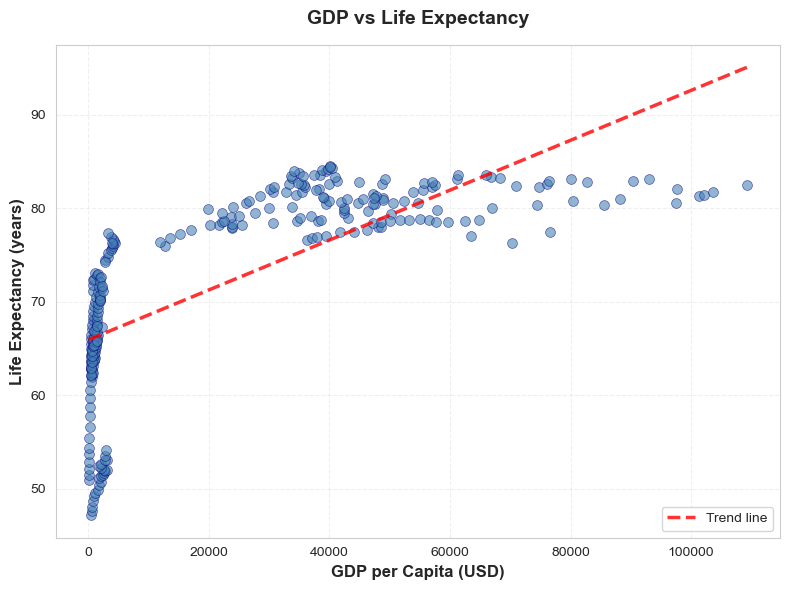

 Plot 1 saved: scatter_plot_1_gdp_vs_life.png


In [20]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Assuming you have 'merged' dataframe with columns:
# 'GDP_per_capita', 'Life_Expectancy', 'Healthcare_Spending'

# ============================================
# PLOT 1: GDP vs Life Expectancy
# ============================================
plt.figure(figsize=(8, 6))
plt.scatter(merged['GDP_per_capita'], merged['Life_Expectancy'], 
            alpha=0.6, s=50, color='steelblue', edgecolors='navy', linewidth=0.5)

plt.xlabel('GDP per Capita (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Life Expectancy (years)', fontsize=12, fontweight='bold')
plt.title('GDP vs Life Expectancy', fontsize=14, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3, linestyle='--')

# Add trend line
z1 = np.polyfit(merged['GDP_per_capita'], merged['Life_Expectancy'], 1)
p1 = np.poly1d(z1)
x_trend = np.linspace(merged['GDP_per_capita'].min(), 
                      merged['GDP_per_capita'].max(), 100)
plt.plot(x_trend, p1(x_trend), 
         "r--", alpha=0.8, linewidth=2.5, label='Trend line')

plt.legend(fontsize=10, loc='lower right')
plt.tight_layout()
plt.savefig('scatter_plot_1_gdp_vs_life.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot 1 saved: scatter_plot_1_gdp_vs_life.png")

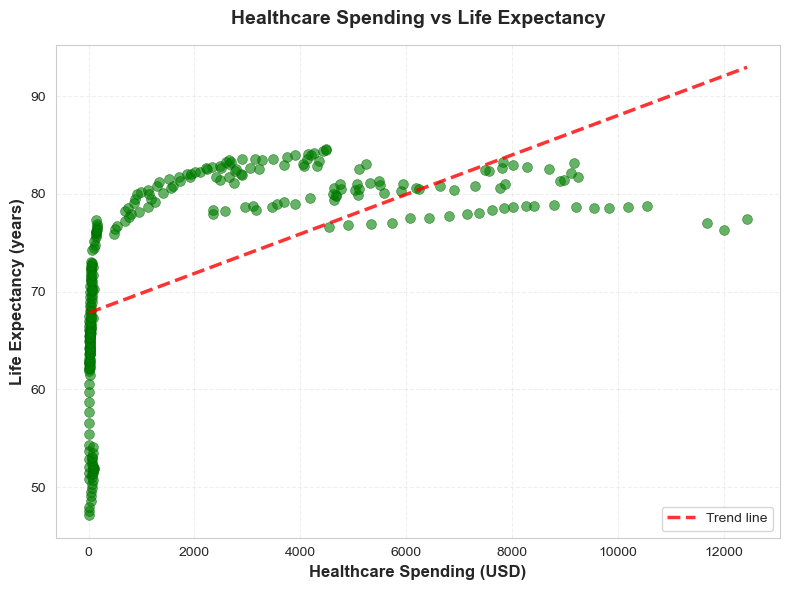

 Plot 2 saved: scatter_plot_2_healthcare_vs_life.png


In [21]:
# PLOT 2: Healthcare Spending vs Life Expectancy

plt.figure(figsize=(8, 6))
plt.scatter(merged['Healthcare_Spending'], merged['Life_Expectancy'], 
            alpha=0.6, s=50, color='green', edgecolors='darkgreen', linewidth=0.5)

plt.xlabel('Healthcare Spending (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Life Expectancy (years)', fontsize=12, fontweight='bold')
plt.title('Healthcare Spending vs Life Expectancy', fontsize=14, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3, linestyle='--')

# Add trend line
z2 = np.polyfit(merged['Healthcare_Spending'], merged['Life_Expectancy'], 1)
p2 = np.poly1d(z2)
x_trend = np.linspace(merged['Healthcare_Spending'].min(), 
                      merged['Healthcare_Spending'].max(), 100)
plt.plot(x_trend, p2(x_trend), 
         "r--", alpha=0.8, linewidth=2.5, label='Trend line')

plt.legend(fontsize=10, loc='lower right')
plt.tight_layout()
plt.savefig('scatter_plot_2_healthcare_vs_life.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot 2 saved: scatter_plot_2_healthcare_vs_life.png")


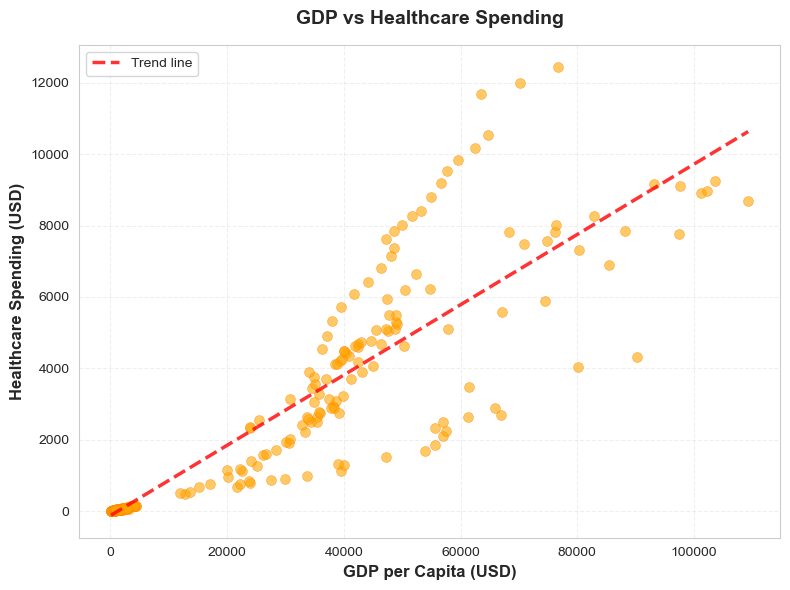

 Plot 3 saved: scatter_plot_3_gdp_vs_healthcare.png


In [24]:
# PLOT 3: GDP vs Healthcare Spending

plt.figure(figsize=(8, 6))
plt.scatter(merged['GDP_per_capita'], merged['Healthcare_Spending'], 
            alpha=0.6, s=50, color='orange', edgecolors='darkorange', linewidth=0.5)

plt.xlabel('GDP per Capita (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Healthcare Spending (USD)', fontsize=12, fontweight='bold')
plt.title('GDP vs Healthcare Spending', fontsize=14, fontweight='bold', pad=15)
plt.grid(True, alpha=0.3, linestyle='--')

# Add trend line
z3 = np.polyfit(merged['GDP_per_capita'], merged['Healthcare_Spending'], 1)
p3 = np.poly1d(z3)
x_trend = np.linspace(merged['GDP_per_capita'].min(), 
                      merged['GDP_per_capita'].max(), 100)
plt.plot(x_trend, p3(x_trend), 
         "r--", alpha=0.8, linewidth=2.5, label='Trend line')

plt.legend(fontsize=10, loc='upper left')
plt.tight_layout()
plt.savefig('scatter_plot_3_gdp_vs_healthcare.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Plot 3 saved: scatter_plot_3_gdp_vs_healthcare.png")

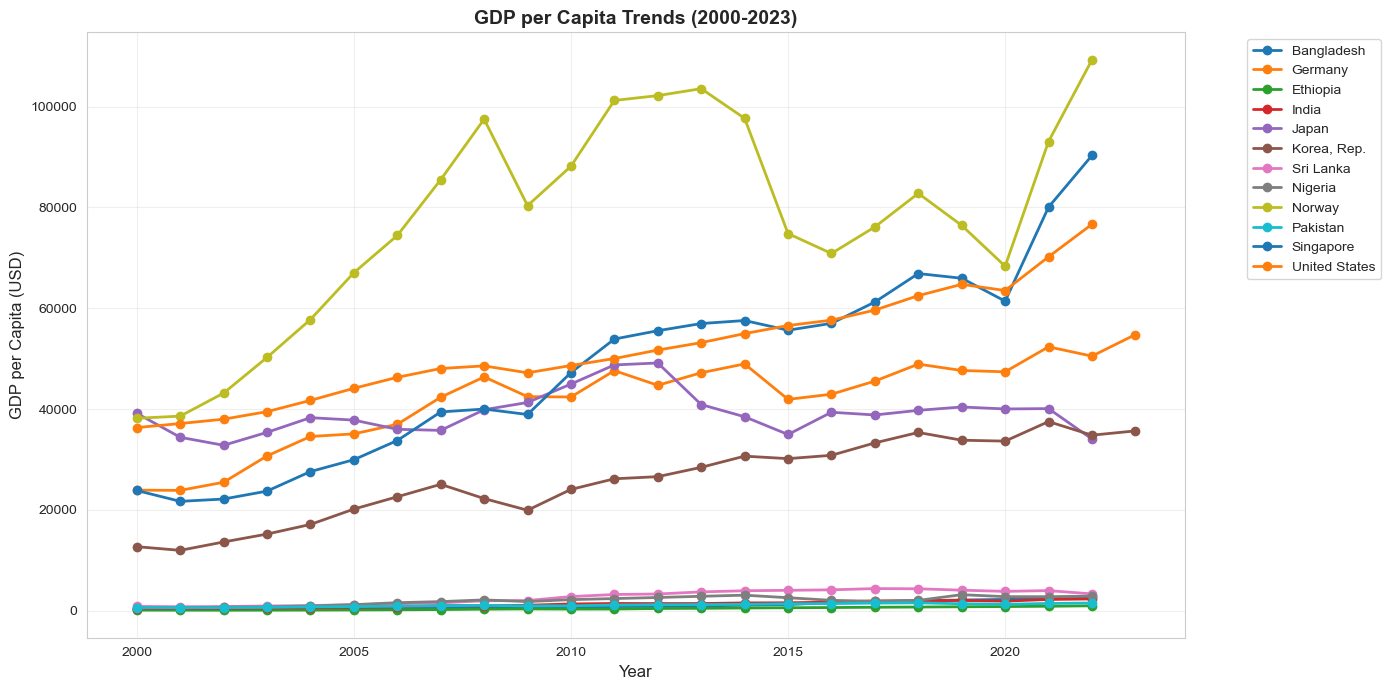

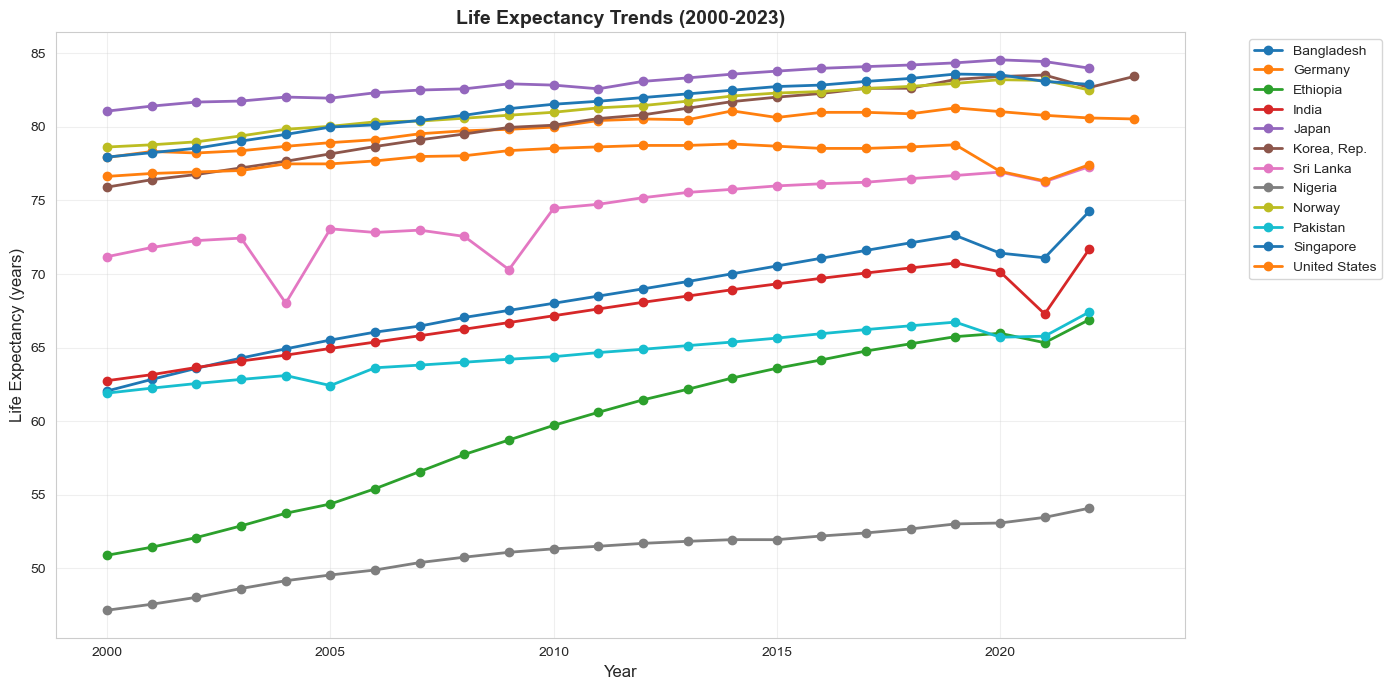

 Time series plots saved!


In [25]:
# Time series for all countries
countries = merged['Country Name'].unique()

# Plot GDP trends
plt.figure(figsize=(14, 7))
for country in countries:
    country_data = merged[merged['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['GDP_per_capita'], 
             marker='o', label=country, linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per Capita (USD)', fontsize=12)
plt.title('GDP per Capita Trends (2000-2023)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('gdp_trends_all_countries.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot Life Expectancy trends
plt.figure(figsize=(14, 7))
for country in countries:
    country_data = merged[merged['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Life_Expectancy'], 
             marker='o', label=country, linewidth=2)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)
plt.title('Life Expectancy Trends (2000-2023)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('life_expectancy_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Time series plots saved!")

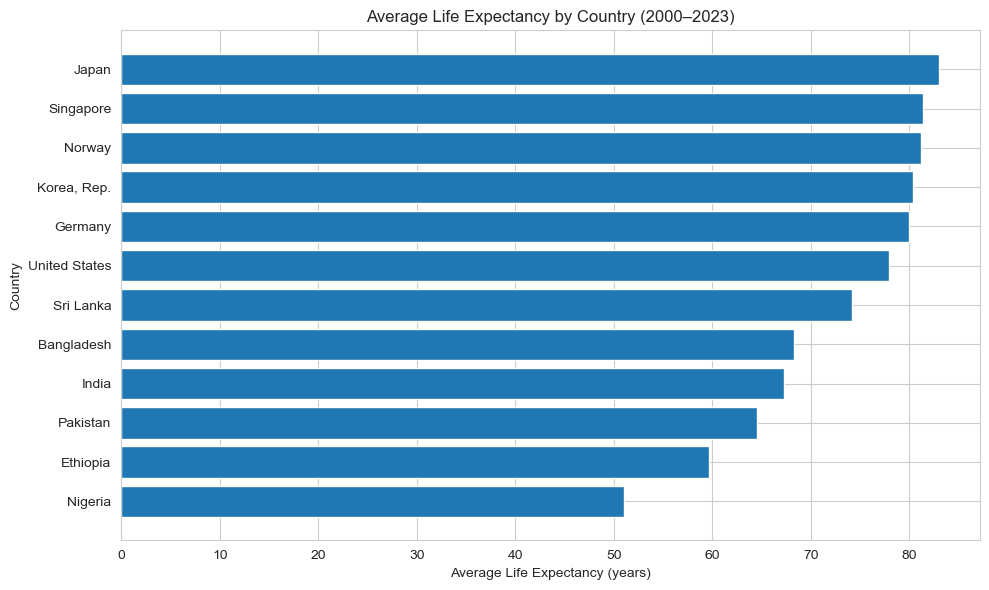

In [26]:
# Calculate average life expectancy per country
avg_life = merged.groupby('Country Name')['Life_Expectancy'].mean().sort_values()

plt.figure(figsize=(10,6))
plt.barh(avg_life.index, avg_life.values)

plt.xlabel('Average Life Expectancy (years)')
plt.ylabel('Country')
plt.title('Average Life Expectancy by Country (2000–2023)')

plt.tight_layout()
plt.savefig('avg_life_expectancy_bar.png', dpi=300)
plt.show()

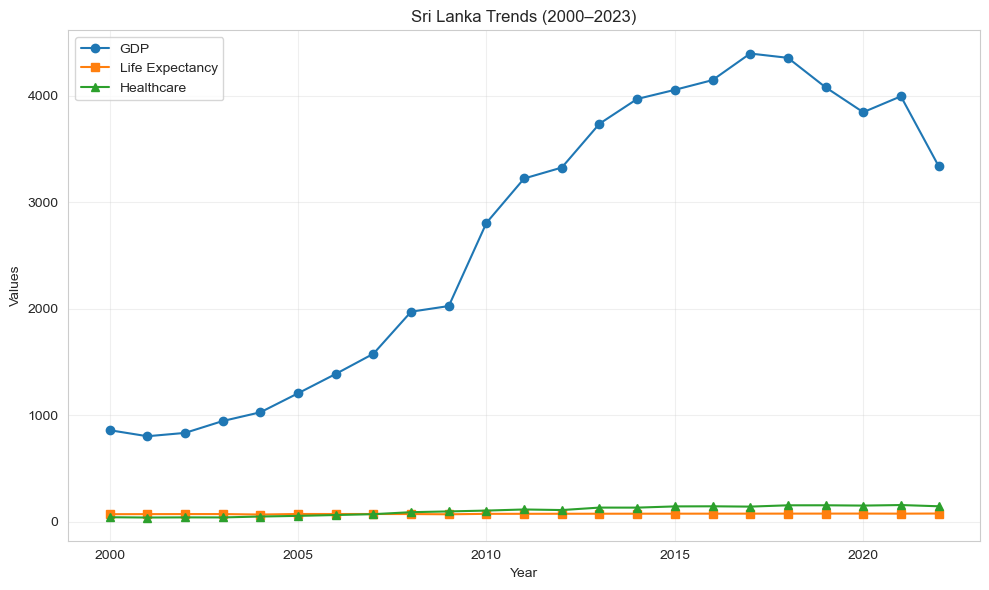

In [27]:
sl_data = merged[merged['Country Name'] == 'Sri Lanka']

plt.figure(figsize=(10,6))

plt.plot(sl_data['Year'], sl_data['GDP_per_capita'], marker='o', label='GDP')
plt.plot(sl_data['Year'], sl_data['Life_Expectancy'], marker='s', label='Life Expectancy')
plt.plot(sl_data['Year'], sl_data['Healthcare_Spending'], marker='^', label='Healthcare')

plt.title('Sri Lanka Trends (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('srilanka_analysis.png', dpi=300)
plt.show()

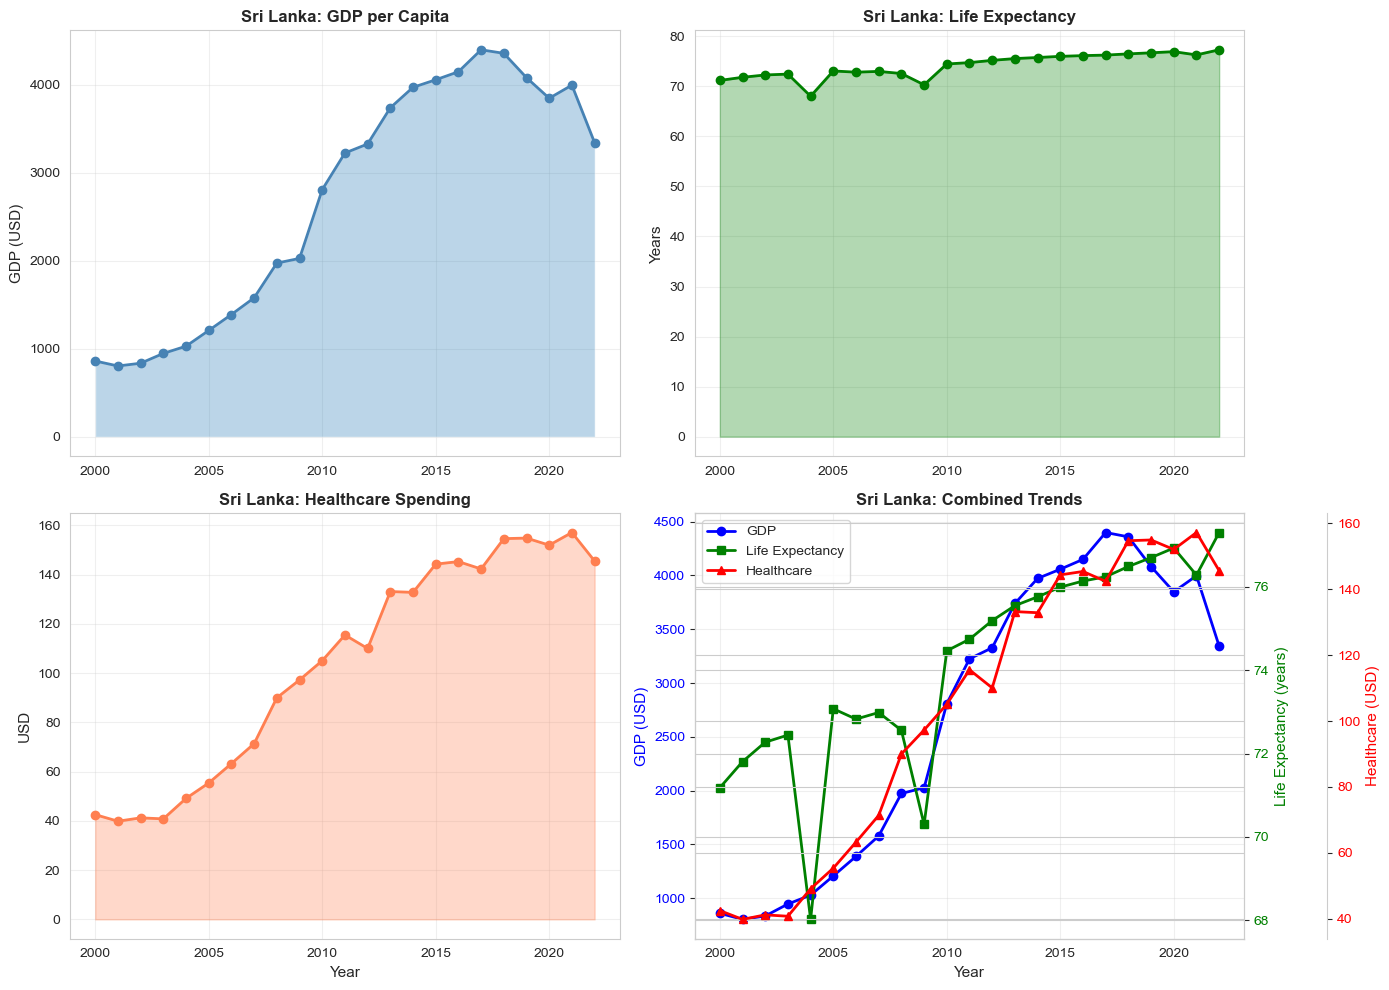

 Sri Lanka analysis saved!


In [29]:
# Sri Lanka specific analysis
sl_data = merged[merged['Country Name'] == 'Sri Lanka'].copy()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# GDP trend
axes[0, 0].plot(sl_data['Year'], sl_data['GDP_per_capita'], 
                marker='o', color='steelblue', linewidth=2, markersize=6)
axes[0, 0].set_title('Sri Lanka: GDP per Capita', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('GDP (USD)', fontsize=11)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].fill_between(sl_data['Year'], sl_data['GDP_per_capita'], alpha=0.3)

# Life Expectancy trend
axes[0, 1].plot(sl_data['Year'], sl_data['Life_Expectancy'], 
                marker='o', color='green', linewidth=2, markersize=6)
axes[0, 1].set_title('Sri Lanka: Life Expectancy', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Years', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].fill_between(sl_data['Year'], sl_data['Life_Expectancy'], alpha=0.3, color='green')

# Healthcare Spending trend
axes[1, 0].plot(sl_data['Year'], sl_data['Healthcare_Spending'], 
                marker='o', color='coral', linewidth=2, markersize=6)
axes[1, 0].set_title('Sri Lanka: Healthcare Spending', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('USD', fontsize=11)
axes[1, 0].set_xlabel('Year', fontsize=11)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].fill_between(sl_data['Year'], sl_data['Healthcare_Spending'], alpha=0.3, color='coral')

# Combined view
ax2 = axes[1, 1]
ax2_twin1 = ax2.twinx()
ax2_twin2 = ax2.twinx()
ax2_twin2.spines['right'].set_position(('outward', 60))

p1 = ax2.plot(sl_data['Year'], sl_data['GDP_per_capita'], 
              'b-', marker='o', label='GDP', linewidth=2)
p2 = ax2_twin1.plot(sl_data['Year'], sl_data['Life_Expectancy'], 
                    'g-', marker='s', label='Life Expectancy', linewidth=2)
p3 = ax2_twin2.plot(sl_data['Year'], sl_data['Healthcare_Spending'], 
                    'r-', marker='^', label='Healthcare', linewidth=2)

ax2.set_xlabel('Year', fontsize=11)
ax2.set_ylabel('GDP (USD)', color='b', fontsize=11)
ax2_twin1.set_ylabel('Life Expectancy (years)', color='g', fontsize=11)
ax2_twin2.set_ylabel('Healthcare (USD)', color='r', fontsize=11)
ax2.set_title('Sri Lanka: Combined Trends', fontsize=12, fontweight='bold')

ax2.tick_params(axis='y', labelcolor='b')
ax2_twin1.tick_params(axis='y', labelcolor='g')
ax2_twin2.tick_params(axis='y', labelcolor='r')

lines = p1 + p2 + p3
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('srilanka_detailed_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Sri Lanka analysis saved!")

In [30]:

# Calculate correlations (how strongly two things are related)
# Pearson correlation: r value ranges from -1 to +1
# +1 = perfect positive relationship, 0 = no relationship, -1 = perfect negative relationship

corr1, pval1 = stats.pearsonr(merged['GDP_per_capita'], merged['Life_Expectancy'])
# Check: Does higher GDP mean longer life?

corr2, pval2 = stats.pearsonr(merged['Healthcare_Spending'], merged['Life_Expectancy'])
# Check: Does more healthcare spending mean longer life?

corr3, pval3 = stats.pearsonr(merged['GDP_per_capita'], merged['Healthcare_Spending'])
# Check: Does higher GDP mean more healthcare spending?

# Get Sri Lanka specific data
sl_data = merged[merged['Country Name'] == 'Sri Lanka']
# Filter to get only Sri Lanka rows

sl_latest = sl_data[sl_data['Year'] == sl_data['Year'].max()].iloc[0]
# Get the most recent year data for Sri Lanka (.iloc[0] gets the first row)

sl_first = sl_data[sl_data['Year'] == sl_data['Year'].min()].iloc[0]
# Get the earliest year data for Sri Lanka

# Calculate Sri Lanka's growth over time
gdp_growth = ((sl_latest['GDP_per_capita'] - sl_first['GDP_per_capita']) / sl_first['GDP_per_capita'] * 100)
# GDP growth percentage = (new - old) / old * 100

life_improvement = sl_latest['Life_Expectancy'] - sl_first['Life_Expectancy']
# Life expectancy improvement = latest year - earliest year

# Print the results
print(f"GDP vs Life: r = {corr1:.3f}")
print(f"Healthcare vs Life: r = {corr2:.3f}")
print(f"GDP vs Healthcare: r = {corr3:.3f}")
print(f"\nSri Lanka GDP growth: {gdp_growth:.1f}%")
print(f"Sri Lanka life gain: {life_improvement:.1f} years")

GDP vs Life: r = 0.719
Healthcare vs Life: r = 0.601
GDP vs Healthcare: r = 0.892

Sri Lanka GDP growth: 288.6%
Sri Lanka life gain: 6.1 years


In [31]:
merged[['GDP_per_capita','Life_Expectancy','Healthcare_Spending']].describe()

,GDP_per_capita,Life_Expectancy,Healthcare_Spending
count,278.000000,278.000000,278.000000
mean,24500.785929,72.449354,2288.848431
std,27147.587004,10.083956,2997.361524
min,109.593814,47.143000,5.149642
25%,1149.892542,65.407750,37.719401
50%,12345.891201,76.667293,489.205017
75%,42385.455379,80.790244,4131.735229
max,109269.520580,84.560000,12434.433594


## Key Findings

• GDP per capita shows a positive correlation with life expectancy.  
• Healthcare spending is moderately correlated with life expectancy.  
• Countries with higher economic development tend to show better health outcomes.  
• Sri Lanka demonstrates relatively high life expectancy compared to its GDP level.